# PV Simulation

The OpenEnergyID Module "PV Simulation" is a tool that helps you simulate a PV plant.

## PVLib implementation

A future version of the OpenEnergyID Module "PV Simulation" will use the PVLib library to simulate a PV plant. The PVLib library is a Python library that provides a set of functions to simulate a PV plant. The library is based on the Sandia PV performance model and the CEC performance model.

## Elia implementation

This is a simplified model, that uses the measured load factors for all the PV plants in Belgium. The load factors are calculated and published by Elia, the Belgian transmission system operator.

### Imports

In [10]:
import datetime as dt
import aiohttp

from openenergyid import elia
from openenergyid.pvsim import LoadFactorPVSimulator, LoadFactorRequestParameters

### Parameters

In [11]:
start = dt.date(2025, 1, 1)
end = dt.date(2025, 2, 1)

panel_power = 5  # kWp
inverter_power = 3  # kWp

### Get Elia Load Factors

PV Production is defined as Elia dataset ods032. Check the Elia documentation for more info.

In [12]:
async with aiohttp.ClientSession() as session:
    pv_load_factors = await LoadFactorPVSimulator.download_load_factors(
        start=start, end=end, region=elia.Region.Antwerp, session=session
    )

<Axes: >

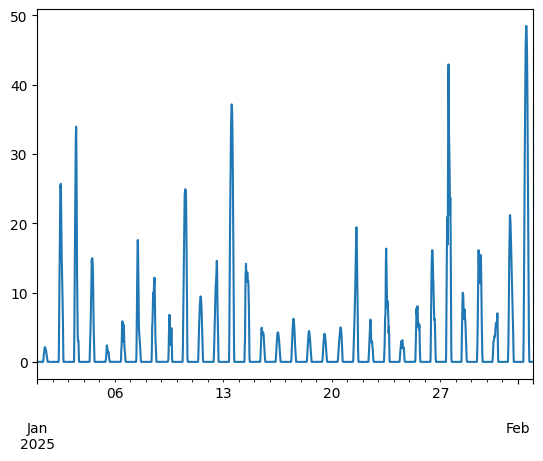

In [13]:
# As you can see, load factor is a number between 0 and 100

pv_load_factors.plot()

### Simulation

In [14]:
simulator = LoadFactorPVSimulator(
    load_factors=pv_load_factors,
    panel_power=panel_power,
    inverter_power=inverter_power,
)

In [15]:
simulator.simulation_results

2025-01-01 00:00:00+01:00    0.0
2025-01-01 00:15:00+01:00    0.0
2025-01-01 00:30:00+01:00    0.0
2025-01-01 00:45:00+01:00    0.0
2025-01-01 01:00:00+01:00    0.0
                            ... 
2025-02-01 22:45:00+01:00    0.0
2025-02-01 23:00:00+01:00    0.0
2025-02-01 23:15:00+01:00    0.0
2025-02-01 23:30:00+01:00    0.0
2025-02-01 23:45:00+01:00    0.0
Name: power, Length: 3072, dtype: float64

<Axes: >

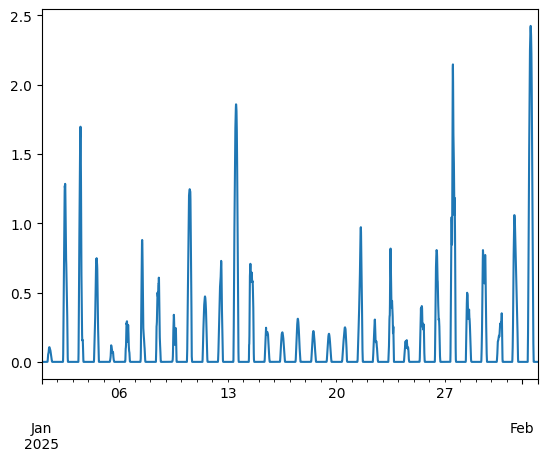

In [16]:
simulator.simulation_results.plot()

## All in one

<Axes: >

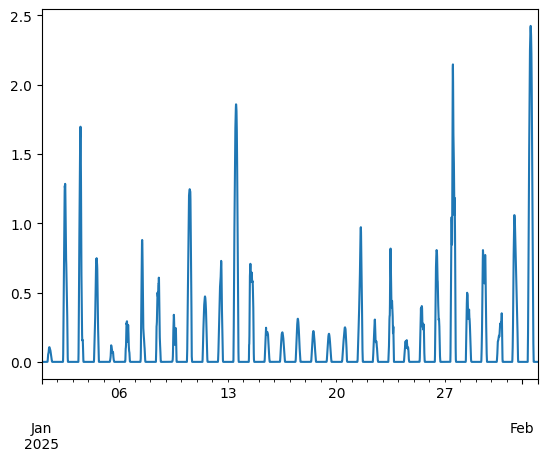

In [17]:
load_factor_request_params = LoadFactorRequestParameters(
    start=start, end=end, region=elia.Region.Antwerp
)

async with aiohttp.ClientSession() as session:
    simulator = await LoadFactorPVSimulator.init_with_load_factor_request(
        request_parameters=load_factor_request_params,
        panel_power=panel_power,
        inverter_power=inverter_power,
        session=session,
    )

simulator.simulation_results.plot()